<a href="https://colab.research.google.com/github/aakashr30/MACHINE-LEARN-1-21-5-2022-/blob/main/Part_II_Time_Series_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv("/content/MonthWiseMarketArrivals_Clean.csv")


In [29]:
data

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012
...,...,...,...,...,...,...,...,...,...,...
10222,YEOLA(MS),December,2011,131326,282,612,526,MS,YEOLA,December-2011
10223,YEOLA(MS),December,2012,207066,485,1327,1136,MS,YEOLA,December-2012
10224,YEOLA(MS),December,2013,215883,472,1427,1177,MS,YEOLA,December-2013
10225,YEOLA(MS),December,2014,201077,446,1654,1456,MS,YEOLA,December-2014


In [30]:
data.describe()

,year,quantity,priceMin,priceMax,priceMod
count,10227.000000,1.022700e+04,10227.000000,10227.000000,10227.000000
mean,2009.022294,7.660488e+04,646.944363,1212.760731,984.284345
std,4.372841,1.244087e+05,673.121850,979.658874,818.471498
min,1996.000000,2.000000e+01,16.000000,145.000000,80.000000
25%,2006.000000,8.898000e+03,209.000000,557.000000,448.000000
50%,2009.000000,2.746000e+04,440.000000,923.000000,747.000000
75%,2013.000000,8.835650e+04,828.000000,1527.000000,1248.000000
max,2016.000000,1.639032e+06,6000.000000,8192.000000,6400.000000


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10227 entries, 0 to 10226
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   market    10227 non-null  object
 1   month     10227 non-null  object
 2   year      10227 non-null  int64 
 3   quantity  10227 non-null  int64 
 4   priceMin  10227 non-null  int64 
 5   priceMax  10227 non-null  int64 
 6   priceMod  10227 non-null  int64 
 7   state     10227 non-null  object
 8   city      10227 non-null  object
 9   date      10227 non-null  object
dtypes: int64(5), object(5)
memory usage: 799.1+ KB


In [32]:
data1=data.loc[df.city=="YEOLA"]
data1

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
10081,YEOLA(MS),January,2004,56549,376,795,741,MS,YEOLA,January-2004
10082,YEOLA(MS),January,2005,202348,149,261,231,MS,YEOLA,January-2005
10083,YEOLA(MS),January,2006,184865,135,299,268,MS,YEOLA,January-2006
10084,YEOLA(MS),January,2007,164865,431,977,870,MS,YEOLA,January-2007
10085,YEOLA(MS),January,2008,387738,150,272,214,MS,YEOLA,January-2008
...,...,...,...,...,...,...,...,...,...,...
10222,YEOLA(MS),December,2011,131326,282,612,526,MS,YEOLA,December-2011
10223,YEOLA(MS),December,2012,207066,485,1327,1136,MS,YEOLA,December-2012
10224,YEOLA(MS),December,2013,215883,472,1427,1177,MS,YEOLA,December-2013
10225,YEOLA(MS),December,2014,201077,446,1654,1456,MS,YEOLA,December-2014


In [33]:
data2=data1.drop(["month","year","quantity","priceMin","priceMax","state","city"],axis=1)
data2

,market,priceMod,date
10081,YEOLA(MS),741,January-2004
10082,YEOLA(MS),231,January-2005
10083,YEOLA(MS),268,January-2006
10084,YEOLA(MS),870,January-2007
10085,YEOLA(MS),214,January-2008
...,...,...,...
10222,YEOLA(MS),526,December-2011
10223,YEOLA(MS),1136,December-2012
10224,YEOLA(MS),1177,December-2013
10225,YEOLA(MS),1456,December-2014


In [34]:
data1.index=pd.PeriodIndex(data1.date,freq='M')
data1

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
date,,,,,,,,,,
2004-01,YEOLA(MS),January,2004,56549,376,795,741,MS,YEOLA,January-2004
2005-01,YEOLA(MS),January,2005,202348,149,261,231,MS,YEOLA,January-2005
2006-01,YEOLA(MS),January,2006,184865,135,299,268,MS,YEOLA,January-2006
2007-01,YEOLA(MS),January,2007,164865,431,977,870,MS,YEOLA,January-2007
2008-01,YEOLA(MS),January,2008,387738,150,272,214,MS,YEOLA,January-2008
...,...,...,...,...,...,...,...,...,...,...
2011-12,YEOLA(MS),December,2011,131326,282,612,526,MS,YEOLA,December-2011
2012-12,YEOLA(MS),December,2012,207066,485,1327,1136,MS,YEOLA,December-2012
2013-12,YEOLA(MS),December,2013,215883,472,1427,1177,MS,YEOLA,December-2013


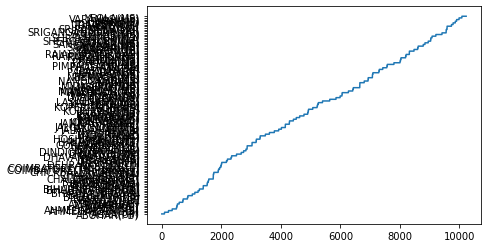

In [35]:
#Checking for stationarity
plt.plot(data['market'])

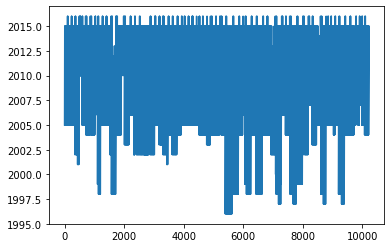

In [36]:
#Checking for stationarity
plt.plot(data['year'])

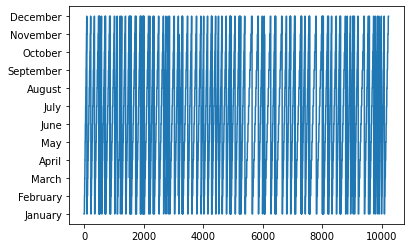

In [37]:
#Checking for stationarity
plt.plot(data['month'])

In [43]:
#convert to time series:
ts = data['month']
ts.head(10)

0     January
1     January
2     January
3     January
4     January
5     January
6     January
7     January
8    February
9    February
Name: month, dtype: object

In [44]:
#Function for testing stationarity
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    #rolmean = pd.rolling_mean(timeseries, window=12)
    rolmean=timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [45]:
test_stationarity(ts)

DataError: ignored

In [ ]:
#Making Time series Stationary
ts_log = np.log(ts)
plt.plot(ts_log)

In [ ]:
#Smoothing:Moving average
test_stationarity(ts_log)

In [ ]:
#Again not stationary as it's an upward trend
moving_avg=ts_log.rolling(12).mean()
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff[7:15]